# Artificial Neural Network Play 2: Simple Neural Networks

Part one can be found [here](http://nbviewer.ipython.org/github/Ogaday/ml-play/blob/master/ANN-Play%2001%20Perceptrons.ipynb) and is part of a series on github [here](https://github.com/Ogaday/ml-play). Sources are inlcuded in the first notebook.

This chapter will be focussed on building and activating simple neural networks.

## A simple neural network

Neural networks can be characterized graphically: each neuron or node is represented by a vertex and each axon by an edge. There are several strategies for defining graphs. Commonly, graphs are defined by a triple: $(V, E, \varepsilon)$ where $V$ is the set of vertices, $E$ is the set of edges and $\varepsilon$ is the endpoint map $\varepsilon:E\to P_1\{V\}\cup P_2\{V\}$. (A mapping of edges to the union of the power set of one and the power set of two of the set of vertices). In this case, the graph is weighted, so we introduce a metric map $\mu$ such that $\mu: E \to \mathbb R$, where $\mathbb R$ is the set of real values and the mapping denotes of the weight on each edge. Furthermore, this graph should be loop free, so in fact we can simplify $\varepsilon$ to $\varepsilon:E\to P_2\{V\}$ and as this graph is directed, order of the elements of $p_i \in P_2\{V\}$ matters.

However, there is a representation that is better suited for translation to a data structure:  the adjacency matrix. For a weighted graph, this is simply defined by $A_{ij} = w_{ij}$ where $w_{ij}$ is the weight of the edge between the vertices $i$ and $j$. This is a much more direct way of representing a graph digitally.

I implemented a quick graphical representation of an artificial nueral network in order to go through Carlos Gershenson's [tutorial](https://datajobs.com/data-science-repo/Neural-Net-%5BCarlos-Gershenson%5D.pdf).

In [6]:
from ann import ANN

In an adjacency matrix, the $i, j^{th}$ entry represents the weight on the edge between the $i$ and $j$. I use a negative value to represent no edge. **Lemma**: There is no cost to traverse nowhere, so the entry $(i,i):= 0$ (this could however, maybe more practically be -1 in a neural network I believe my implementation is agnostic to it.). **Corollary**: In order represent multiple edges between vertices, it is necessary to have instead the $i, j^{th}$ entry as an array of the edges between the two vertices. This is not a requirement for dealing with neural networks, so we will stick with the original implementation. **Corollary**: This form is most suited to representing directed graphs, which is exactly what we need. Instead, we could impose symetry on the adjacency matrix along the leading diagonal, so the cost of traversing between two vertices is equivalent. This, however, will not be necessary. **Finally**: As we are representing the network as a graph, I simulate the inputs and outputs with additional vertices. That is, despite frequent illustrations of these neworks with inputs and outputs having no terminating feature, each edge starts or terminates with a node in my represenation.

Let's try to define the network necessary to describe exercise $3.1$ in the tutorial. Gershenson describes a network with an input layer containing two neurons and an output layer containing two neurons. Here are some ascii illustrations:
```

o    o
|    |
|    |
o    o
|\  /|
| \/ |
| /\ |
|/  \|
o    o
|    |
|    |
o    o

o  o
|  |
o  o
|\/|
|/\|
o  o
|  |
o  o

--->
0  2     4  6
o--o-----o--o
    \   /
     \ /
      x
     / \
    /   \
o--o-----o--o
1  3     5  7
```

In [24]:
from ann import ANN

In [ ]:
# Initial graph with all edges weighted as 1.
Ga=ANN([[ 0,-1, 1,-1,-1,-1,-1,-1],
        [-1, 0,-1, 1,-1,-1,-1,-1],
        [-1,-1, 0,-1, 1, 1,-1,-1],
        [-1,-1,-1, 0, 1, 1,-1,-1],
        [-1,-1,-1,-1, 0,-1, 1,-1],
        [-1,-1,-1,-1,-1, 0,-1, 1],
        [-1,-1,-1,-1,-1,-1, 0,-1],
        [-1,-1,-1,-1,-1,-1,-1, 0]], sum)


Evidently, I already have a problem... What if the weights want to be negative or $0$? Do unconnected nodes as ```None```? Keep an independent list of edges? But then I'm back to the tripple represntation of $(V,E, \varepsilon)$ and that's more complicated. Maybe I do go back to that representation and implement a vertex object? Alternatively... look back at my own suggestion and have each $i,j^{th}$ member represented as a list: empty means no connection edge. Seems wasteful, but could be doable. Alternatively... just have a ```None``` where there is no connection. That works too. Seems antipatterny.

In [23]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


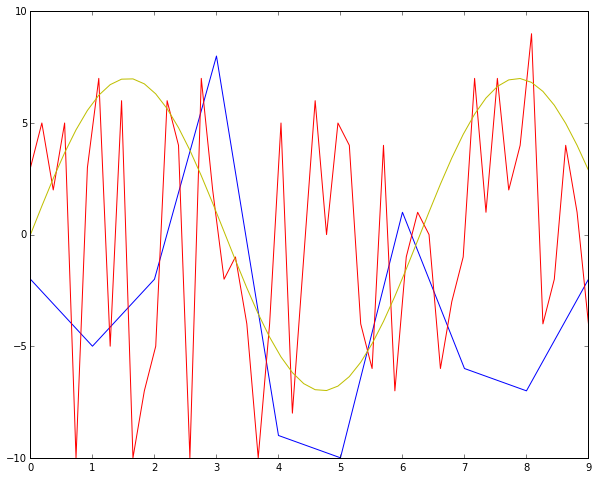

In [22]:
figsize(10,8)
plot([i for i in range(10)], [np.random.randint(-10,10) for i in range(10)])
x = np.linspace(0,9)
plot(x, [np.random.randint(-10,10) for xx in x], "r")
plot(x, 7*np.sin(x), "y")